# Topic
The idea is  about microbreweries in the US and the dataset is from <a href='https://www.beermonthclub.com/'>here</a>
It contains information about breweries available on the site as of Oct 1st, 2019.

For more details, please click on <a href='https://www.kaggle.com/brkurzawa/us-breweries'>here</a>

### Load Data

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:/Users/jabchoi/Documents/data_set/breweries_us.csv')
df.head()

,brewery_name,type,address,website,state,state_breweries
0,Valley Brewing Co.,Brewpub,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,california,284
1,Valley Brewing Co.,Brewpub,"157 Adams St., Stockton, California, 95204",http://www.valleybrew.com/,california,284
2,Valley Brewing Co,Microbrewery,"1950 W Freemont, Stockton, California, 95203",http://www.valleybrew.com/,california,284
3,Ukiah Brewing Company,Brewpub,"102 S. State St., Ukiah, California, 95482",http://www.ukiahbrewingco.com/,california,284
4,Tustin Brewing Co.,Brewpub,"13011 Newport Ave. #100, Tustin, California, 9...",http://www.tustinbrewery.com/,california,284


Let's see datatyes for each cols

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 6 columns):
brewery_name       2407 non-null object
type               2407 non-null object
address            2407 non-null object
website            2399 non-null object
state              2407 non-null object
state_breweries    2407 non-null int64
dtypes: int64(1), object(5)
memory usage: 113.0+ KB


To doublecheck if there are NULL values in each cols,

In [142]:
df.isnull().sum()

brewery_name       0
type               0
address            0
website            8
state              0
state_breweries    0
dtype: int64

Website col has 8 null values but it does not matter for this case.

### Drop cols including irrelevant info

In [143]:
df1 = df.drop(['brewery_name', 'address', 'website', 'state_breweries'], axis=1)
df1.head()

,type,state
0,Brewpub,california
1,Brewpub,california
2,Microbrewery,california
3,Brewpub,california
4,Brewpub,california


### Group the data by 'type' and see the number of each types

In [144]:
dataframe = df1.groupby('type').count()
dataframe

,state
type,
BOP-BrewOnPremise,6
BOP-BrewOnPremise-Closed,2
Brewpub,1320
Brewpub-Closed,113
Contract,7
ContractBrewery,142
ContractBrewery-Closed,2
Microbrewery,705
Microbrewery-Closed,45


### Change the column name 'state' to 'count of brewery types'

In [145]:
dataframe.columns

Index(['state'], dtype='object')

In [146]:
dataframe.columns = ['Count of brewery types']
dataframe

,Count of brewery types
type,
BOP-BrewOnPremise,6
BOP-BrewOnPremise-Closed,2
Brewpub,1320
Brewpub-Closed,113
Contract,7
ContractBrewery,142
ContractBrewery-Closed,2
Microbrewery,705
Microbrewery-Closed,45


### Bar chart

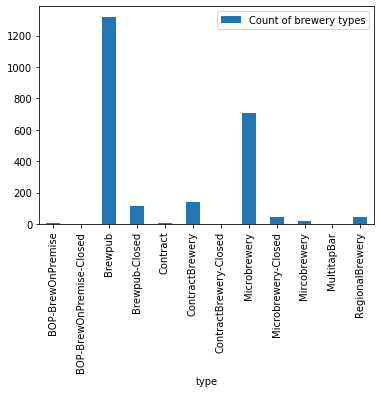

In [147]:
ax = dataframe.plot(kind='bar')

### Let's sort the value by number of brewery types

In [148]:
sorted_value_df = dataframe.sort_values('Count of brewery types', ascending=False)
sorted_value_df.head()

,Count of brewery types
type,
Brewpub,1320
Microbrewery,705
ContractBrewery,142
Brewpub-Closed,113
Microbrewery-Closed,45


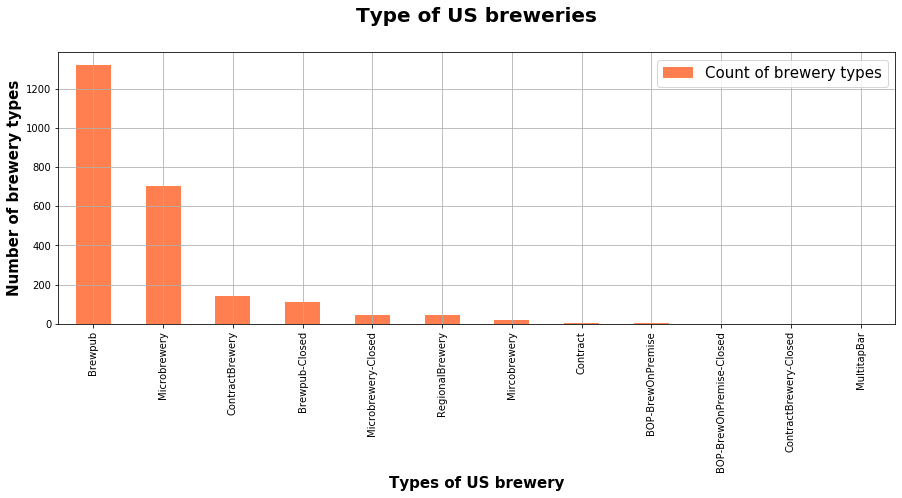

In [149]:
ax = sorted_value_df.plot(kind='bar', facecolor='coral', figsize=(15,5))

ax.grid()
ax.set_title('Type of US breweries', fontsize=20, fontweight='bold', pad=30)
ax.set_xlabel('Types of US brewery', fontsize=15, fontweight='bold')
ax.set_ylabel('Number of brewery types', fontsize=15, fontweight='bold')
ax.legend(fontsize=15)

Result: it shows us 'Brewpub' is the most popluar type of breweries in the US

# Addtional data analysis

### We can analyze data to see which state does have breweies the most

In [150]:
df_state = df1.groupby('state').count()
df_state.head()

,type
state,
alabama,6
alaska,14
arizona,34
arkansas,7
california,284


### Rename the column type to 'number of breweries'

In [151]:
df_state.columns = ['Number of breweries']
df_state.head()

,Number of breweries
state,
alabama,6
alaska,14
arizona,34
arkansas,7
california,284


### Sort the date by number of breweries

In [152]:
sorted_value_state = df_state.sort_values('Number of breweries', ascending=False)
sorted_value_state.head(10)

,Number of breweries
state,
california,284
colorado,182
oregon,156
washington,151
new-york,107
pennsylvania,107
florida,99
michigan,94
texas,90


### Ready to make a bar plot

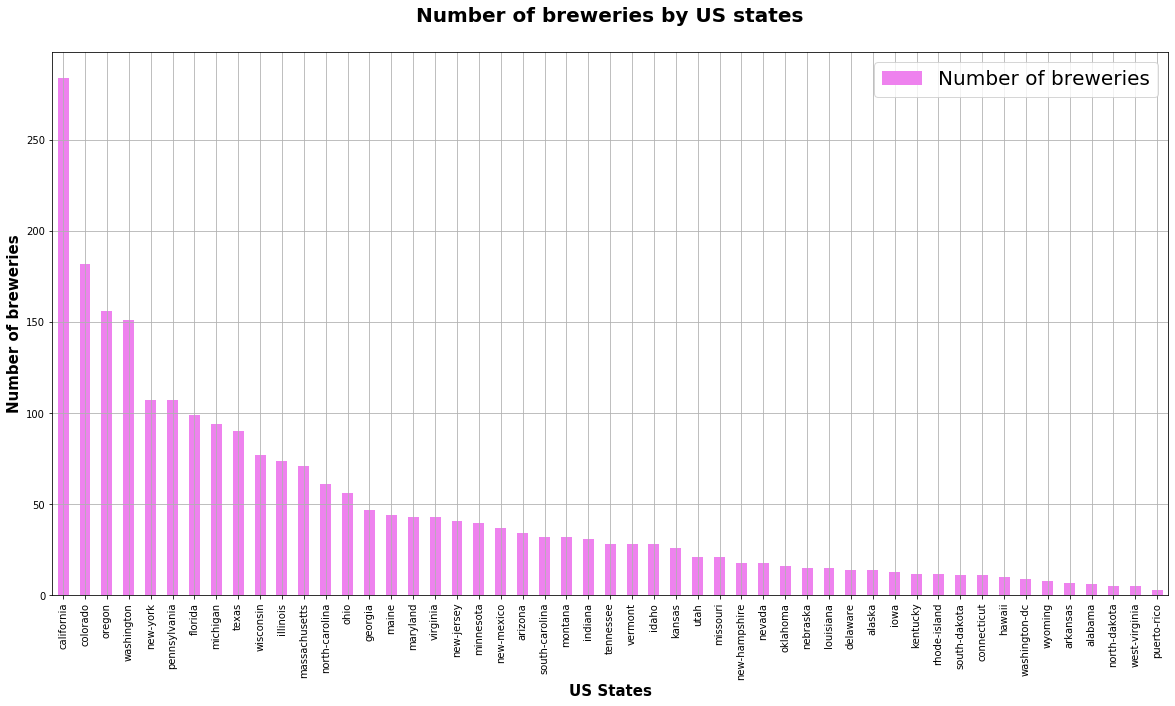

In [153]:
ax_state = sorted_value_state.plot(kind='bar', facecolor='violet', figsize=(20,10))

ax_state.grid()
ax_state.set_title('Number of breweries by US states', fontsize=20, fontweight='bold', pad=30)
ax_state.set_xlabel('US States', fontsize=15, fontweight='bold')
ax_state.set_ylabel('Number of breweries', fontsize=15, fontweight='bold')
ax_state.legend(fontsize=20)

Result: California is the state that has the most breweries in the US